In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [22]:
df = pd.read_excel(r'coefficient2.xlsx')
df

,Unnamed: 0,blood,skin,Fat,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,blood.1,skin.1,Fat.1,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Frequency(THz),refractive index,NaN,NaN,NaN,NaN,NaN,Frequency(THz),absorption coefficient(mm^-1),NaN,NaN,NaN,Path loss (blood) distance d=1mm,NaN,Path loss in dB
1,0.2,2.7108,2.487803,2.0305,NaN,NaN,NaN,0.2,11.7758,7.240005,4.0489,NaN,6.70806e+07,NaN,156.532
2,0.4,2.2105,2.246139,1.9319,NaN,NaN,NaN,0.4,16.0218,9.490481,5.8964,NaN,1.24583e+10,NaN,201.909
3,0.6,2.0427,2.165657,1.8659,NaN,NaN,NaN,0.6,18.6761,11.736955,8.0317,NaN,3.40264e+11,NaN,230.636
4,0.8,1.9573,2.111387,1.8101,NaN,NaN,NaN,0.8,20.9721,14.240531,10.0315,NaN,5.51746e+12,NaN,254.835
5,1,1.9013,2.065012,1.7649,NaN,NaN,NaN,1,23.1726,16.846053,11.7077,NaN,7.34532e+13,NaN,277.32
6,1.2,1.8588,2.023375,1.7295,NaN,NaN,NaN,1.2,25.3088,19.394905,13.0432,NaN,8.56007e+14,NaN,298.65
7,1.4,1.8239,1.986050,1.7021,NaN,NaN,NaN,1.4,27.3544,21.781510,14.0876,NaN,8675615827705397,NaN,318.766
8,1.6,1.794,1.952969,1.6809,NaN,NaN,NaN,1.6,29.2782,23.951465,14.8994,NaN,75062454482432384,NaN,337.508
9,1.8,1.7681,1.923947,1.6644,NaN,NaN,NaN,1.8,31.0583,25.887087,15.5355,NaN,547248001711980800,NaN,354.764


# Linear Regression Model with multiple variable

##### Initializing the data

In [3]:
freq = df.loc[1:, 'Unnamed: 0'] #frequency
pa_lo = df.loc[1:, 'Unnamed: 14'] #path loss (db) for 1mm distance
x = df.loc[1:, ('Unnamed: 0', 'blood', 'blood.1')] #multiple features (frequency, refractive index, absorption coefficient)

##### Fitting the model

In [4]:
model = LinearRegression().fit(x, pa_lo)
y_pred = model.predict(x)

##### Measure the accuracy

In [5]:
r_sq = model.score(x, pa_lo)
print("Regression accuracy = {:0.2f}%".format(100 * r_sq))

Regression accuracy = 99.99%


##### Plotting the data

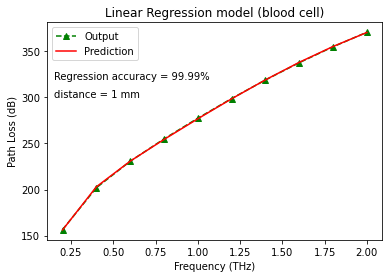

In [6]:
plt.plot(freq, pa_lo, 'g^--', label='Output' )
plt.plot(freq, y_pred, 'r-', label= "Prediction")
plt.text(.15, 320, ("Regression accuracy = {:0.2f}%".format(100 * r_sq)))
plt.text(.15, 300, "distance = 1 mm")
plt.xlabel('Frequency (THz)')
plt.ylabel('Path Loss (dB)')
plt.title('Linear Regression model (blood cell)')
plt.legend()
plt.savefig('prediction_by_Linear_regression.png')

### visualize comparison result as a bar graph 

In [7]:
y_t = np.array(list(pa_lo))
df1 = pd.DataFrame({'Actual': y_t.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,156.531942,156.222994
1,201.909151,202.956391
2,230.636321,230.725304
3,254.834786,254.257719
4,277.320217,276.692962
5,298.649544,298.362388
6,318.766006,318.903605
7,337.508455,337.905636
8,354.763684,355.083557
9,370.496240,370.305789


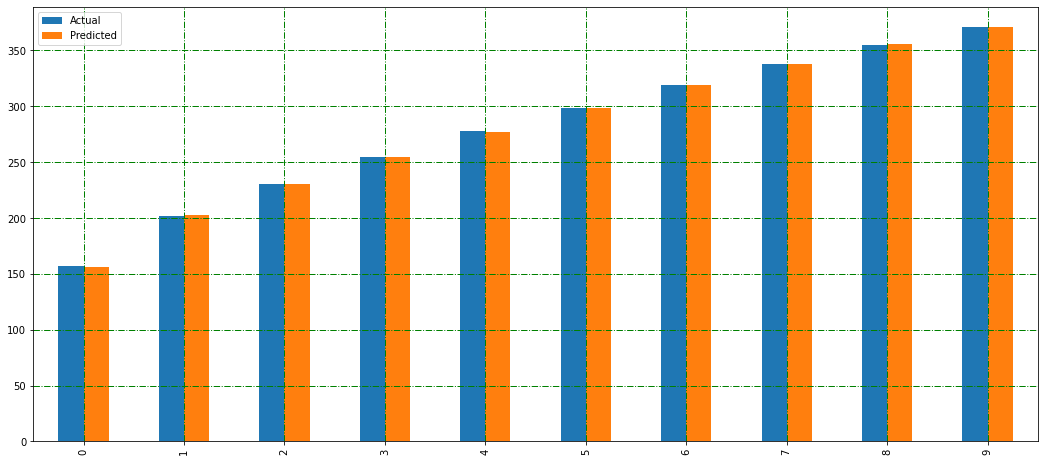

In [8]:
df1.plot(kind='bar',figsize=(18,8))
plt.grid(which='major', linestyle='-.', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

# Decision Tree Regressor
Here we will make another prediction on the values using Decision Tree algorithm.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split as tts


model_tree = DecisionTreeRegressor(random_state=1).fit(x, pa_lo)
prediction_tree = model_tree.predict(x)
r_sq_tree = model_tree.score(x, pa_lo)
print("Regression accuracy = {:0.2f}%".format(100 * r_sq_tree))
print("Mean Absolute Value: ", mae(pa_lo, prediction_tree))

Regression accuracy = 100.00%
Mean Absolute Value:  0.0


Here we are seeing that the model is being probably an overfitted model. So, let's try to make it fitted so that it can be neither underfitted or overfitted by checking the max leaf nodes.

In [10]:
def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    maef = mae(preds_val, val_y )
    return(maef)

train_x, val_x, train_y, val_y = tts(x, pa_lo, random_state=0)
for leaf_nodes in range(2, 11):
    my_mae = get_mae(leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  34
Max leaf nodes: 3  		 Mean Absolute Error:  33
Max leaf nodes: 4  		 Mean Absolute Error:  18
Max leaf nodes: 5  		 Mean Absolute Error:  18
Max leaf nodes: 6  		 Mean Absolute Error:  23
Max leaf nodes: 7  		 Mean Absolute Error:  20
Max leaf nodes: 8  		 Mean Absolute Error:  20
Max leaf nodes: 9  		 Mean Absolute Error:  20
Max leaf nodes: 10  		 Mean Absolute Error:  20


So, here we saw that if we define max_leaf_node = 4, we get the lowest Mean Absolute Value and it will give us the fitted model. So, let's set it to our main model.

In [11]:
model_tree = DecisionTreeRegressor(max_leaf_nodes= 4,random_state=0).fit(x, pa_lo)
prediction_tree = model_tree.predict(x)
r_sq_tree = model_tree.score(x, pa_lo)
print("Regression accuracy = {:0.2f}%".format(100 * r_sq_tree))
print("Mean Absolute Value: ", mae(pa_lo, prediction_tree))

Regression accuracy = 93.71%
Mean Absolute Value:  14.492109393668468


Now lets plotting tha data and make analysis between the prediction data and the output data.

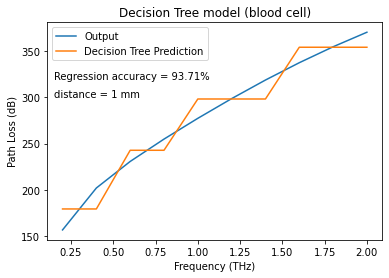

In [12]:
plt.plot(freq, pa_lo, label='Output' )
plt.plot(freq, prediction_tree, label= "Decision Tree Prediction")
plt.text(.15, 320, ("Regression accuracy = {:0.2f}%".format(100 * r_sq_tree)))
plt.text(.15, 300, "distance = 1 mm")
plt.xlabel('Frequency (THz)')
plt.ylabel('Path Loss (dB)')
plt.title('Decision Tree model (blood cell)')
plt.legend()
plt.savefig('prediction_by_decision_tree_algo.png')

### visualize comparison result as a bar graph 

In [13]:
y_t = np.array(list(pa_lo))
df2 = pd.DataFrame({'Actual': y_t.flatten(), 'Predicted': prediction_tree.flatten()})
df2

,Actual,Predicted
0,156.531942,179.220547
1,201.909151,179.220547
2,230.636321,242.735554
3,254.834786,242.735554
4,277.320217,298.245256
5,298.649544,298.245256
6,318.766006,298.245256
7,337.508455,354.256126
8,354.763684,354.256126
9,370.496240,354.256126


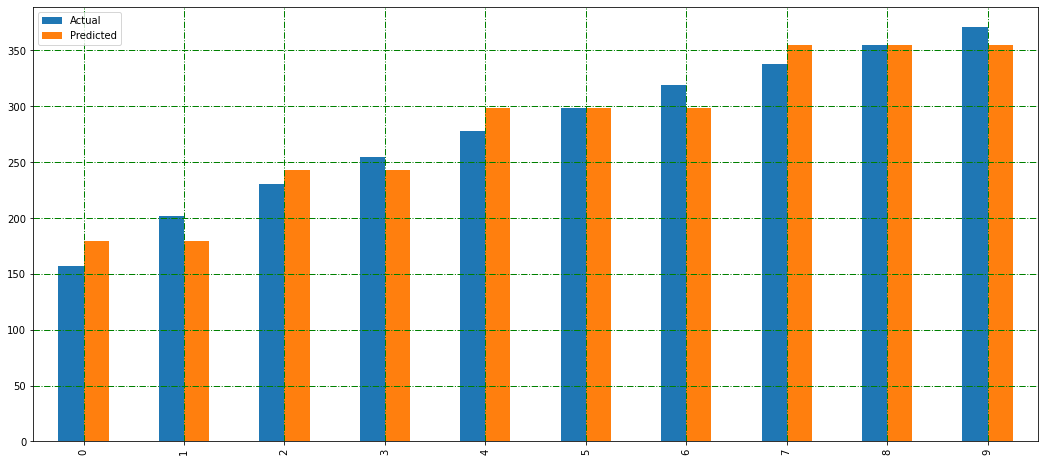

In [14]:
df2.plot(kind='bar',figsize=(18,8))
plt.grid(which='major', linestyle='-.', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

# Random Forest Regressor
Now, here we will make another prediction on the values using Random Forest Regressor algorithm.

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1).fit(x, pa_lo)
rf_pred = rf_model.predict(x)
r_sq_rf = rf_model.score(x, pa_lo)
print("Regression accuracy = {:0.2f}%".format(100 * r_sq_rf))

Regression accuracy = 97.79%


Now lets plotting tha data and make analysis between the prediction data and the output data.

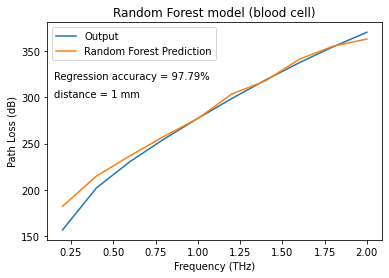

In [16]:
plt.plot(freq, pa_lo, label='Output' )
plt.plot(freq, rf_pred, label= "Random Forest Prediction")
plt.text(.15, 320, ("Regression accuracy = {:0.2f}%".format(100 * r_sq_rf)))
plt.text(.15, 300, "distance = 1 mm")
plt.xlabel('Frequency (THz)')
plt.ylabel('Path Loss (dB)')
plt.title('Random Forest model (blood cell)')
plt.legend()
plt.savefig('prediction_by_random_forest_algo.png')

### visualize comparison result as a bar graph 

In [17]:
y_t = np.array(list(pa_lo))
df3 = pd.DataFrame({'Actual': y_t.flatten(), 'Predicted': rf_pred.flatten()})
df3

,Actual,Predicted
0,156.531942,182.091955
1,201.909151,214.775484
2,230.636321,236.921743
3,254.834786,257.798892
4,277.320217,277.088428
5,298.649544,303.549884
6,318.766006,317.897699
7,337.508455,341.252657
8,354.763684,355.434974
9,370.496240,363.159154


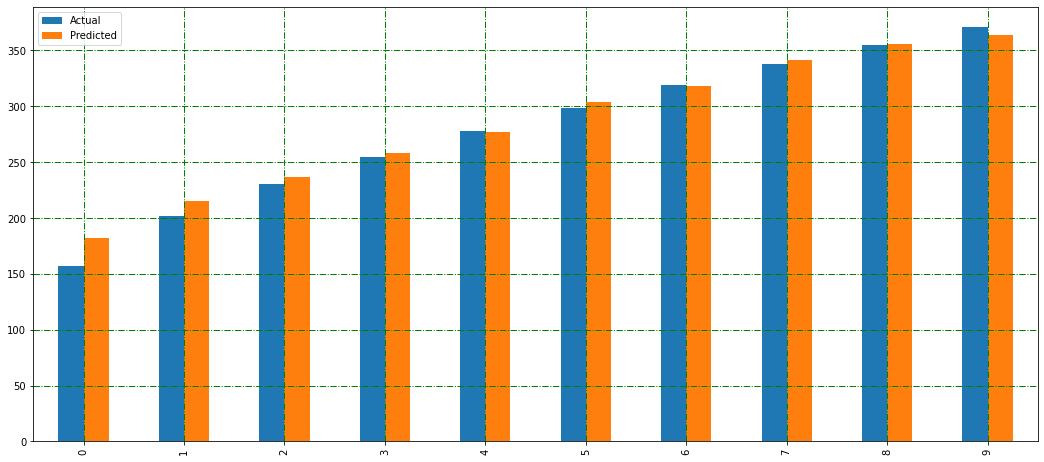

In [18]:
df3.plot(kind='bar',figsize=(18,8))
plt.grid(which='major', linestyle='-.', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

# Neural Network Multi-layer Perceptron Classifier

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [35]:
frequency = df.loc[1:, 'Unnamed: 0']
x = df.loc[1:,("Unnamed: 0", "blood", "blood.1")]
y = df.loc[1:, ("Unnamed: 14")].astype("int")

In [37]:
#Feature Scaling and tranforming the data
scaler = StandardScaler().fit(x)  
x = scaler.transform(x)
x

array([[-1.5666989 ,  2.62659667, -1.83800227],
       [-1.21854359,  0.82529401, -1.17967246],
       [-0.87038828,  0.22113933, -0.76813104],
       [-0.52223297, -0.08633867, -0.41214299],
       [-0.17407766, -0.28796359, -0.07096194],
       [ 0.17407766, -0.44098251,  0.26024959],
       [ 0.52223297, -0.56663804,  0.57741386],
       [ 0.87038828, -0.67429135,  0.87569339],
       [ 1.21854359, -0.76754287,  1.15169266],
       [ 1.5666989 , -0.84927298,  1.4038612 ]])

In [48]:
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(10), max_iter=1000).fit(x, y)

mlp_prediction = mlp.predict(x)
accuracy = mlp.score(x,y)
print("Model accuracy = {:0.2f}%".format(accuracy*100))

Model accuracy = 100.00%


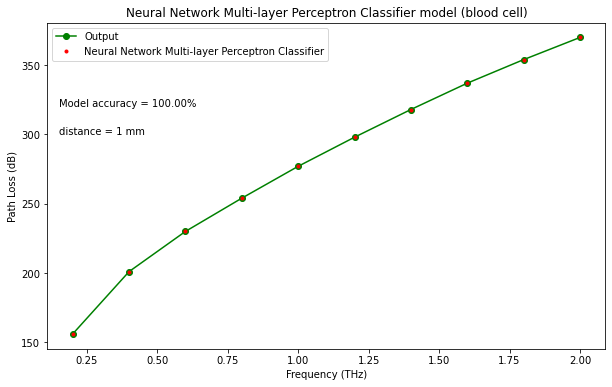

In [49]:
plt.figure(figsize=(10,6))
plt.plot(frequency, y, "go-", label='Output' )
plt.plot(frequency, mlp_prediction, "r.", label= "Neural Network Multi-layer Perceptron Classifier")
plt.text(.15, 320, ("Model accuracy = {:0.2f}%".format(100 * accuracy)))
plt.text(.15, 300, "distance = 1 mm")
plt.xlabel('Frequency (THz)')
plt.ylabel('Path Loss (dB)')
plt.title('Neural Network Multi-layer Perceptron Classifier model (blood cell)')
plt.legend()
plt.savefig('prediction_by_Neural_Network_MLPClassifier_algo.png')

# Final analysis among Linear Regression, Decision Tree, Random Forest algorithms.

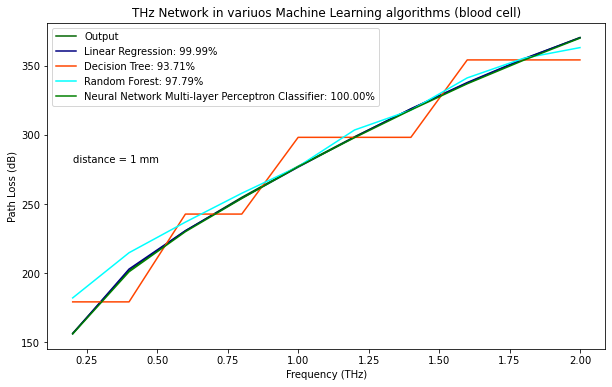

In [50]:
plt.figure(figsize=(10,6))
plt.plot(freq, pa_lo, color='darkgreen', label='Output')
plt.plot(freq, y_pred, color= 'navy', label= "Linear Regression: {:0.2f}%".format(100 * r_sq))
plt.plot(freq, prediction_tree, color= 'orangered', label= "Decision Tree: {:0.2f}%".format(100 * r_sq_tree))
plt.plot(freq, rf_pred, color= 'cyan', label= "Random Forest: {:0.2f}%".format(100 * r_sq_rf))
plt.plot(freq, mlp_prediction, color= 'green', label= "Neural Network Multi-layer Perceptron Classifier: {:0.2f}%".format(100 * accuracy))
plt.text(.20, 280, "distance = 1 mm")
plt.xlabel('Frequency (THz)')
plt.ylabel('Path Loss (dB)')
plt.title('THz Network in variuos Machine Learning algorithms (blood cell)')
plt.legend()
plt.savefig('final_analysis.png')
plt.show()